### 緯度経度ポイントのリストから経路検索を行ってSHPに吐き出すよ
- OSMnx,Geopandas,Pandasのインポートが必要です
- APIをたたいて結果を取得するので、大量のリクエストはご遠慮ください
- ざっくり書いたので雑いですごめんなさい
- 検索距離もリスト化してforを回してみてもよいかもしれません


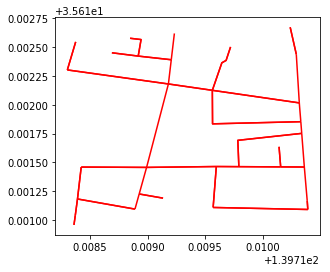

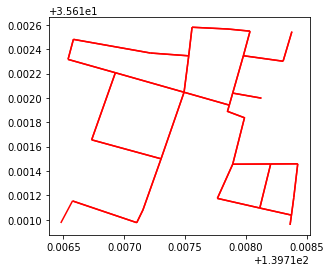

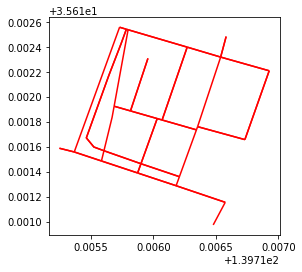

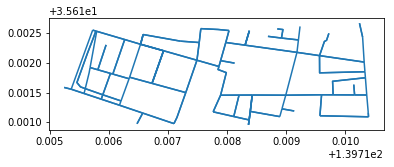

In [2]:
import osmnx as ox
import geopandas as gpd
import pandas as pd

# 緯度経度csvデータ読み込み

df_list = []
pt = pd.read_csv("point.csv")

# OSMnxで各ポイントごとに100m距離、all条件で経路検索、表示

for ptx, rowp in pt.iterrows():
    G = ox.graph_from_point(center_point=(rowp['lat'], rowp['lon']), network_type='all', distance=100)
    gdf = ox.save_load.graph_to_gdfs(G, edges=True)
    gdf[1].plot(color='red')
    df_list.append(gdf[1])

# 経路検索結果のマージと表示

data = pd.concat(df_list, sort='true')
data.plot()

# SHPに書き出す

gdf=data['geometry']
gdf.to_file('all_network.shp') 